## DAV 5400 Project 1 (M6)

## Our Group: Yifeng Lin & Yuan Zheng

# Introduction

For this assignment we will be utilizing a data set on restaurant business rankings 2020(top 250) to answer research questions.

First we will import pandas, numpy, matploblib and seaborn. Next we will read the file into Jupyter by using the code provided in the assignment.

In [6]:
# first import pandas
import pandas as pd

# also import numpy, just in case
import numpy as np

# OPTIONAL: load the Series and DataFrame functions if you want to avoid the use of 
# the 'pd' predicate every time you want to create a new Series or 
# DataFrame object.
from pandas import Series, DataFrame

%matplotlib notebook

In [7]:
# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

In [8]:
import seaborn as sns

In [9]:
#use the code provided in the assignment to read the file
filename = "https://raw.githubusercontent.com/675874815/DAV-5401/master/Top251.csv"
re = pd.read_csv(filename)

#show the framework
re

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,0.049,13846,-0.005,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,0.086,15049,0.030,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,0.130,2470,0.050,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,0.090,6766,0.027,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,0.027,7346,0.002,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-0.104,18,-0.053,NaN,Varied Menu
246,247,PDQ,NaN,127,-0.055,56,-0.111,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,0.121,25,0.087,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,0.101,270,0.071,NaN,Burger


### Task: Designate Research Questions

For this task, the dataset can be used to tell the story of what 2020 was like for restaurants, what was hot, what could be more popular soon, or what the difference is between large companies and smaller businesses. Answers to the following questions will help to inform the decision making a choice to eat in which restaurant:

1. What is the correlation between sales and units?

2. What is the distribution about the whole top250 restaurants' units during last year?

3. According to the'Quick Service & Coffee Cafe' and 'Quick Service & Burger', which one had better sales last year?

# Data Summary

This data comes from the [Kaggle Data Sets.](https://www.kaggle.com/datasets) A description of the dataset can be found [here.](https://www.kaggle.com/michau96/restaurant-business-rankings-2020?select=Top250.csv)

There are 9 attributes in this dataset:

1. Rank: Position in ranking;

2. Restaurant: Name of restaurant;

3. Content: Description, only for certain restaurants;

4. Sales: in 2019 ($000000);

5. YOY_Sales: Year on year sales increase in %;

6. Units: Number of premises in US;

7. YOY_Units: Year on year premises increase in %;

8. Headquarters: Place of the restaurant's headquarters;

9. Segment_Category: Menu type and / or industry segment.

The specific type of each data is below:

In [10]:
print(re.dtypes)

Rank                  int64
Restaurant           object
Content              object
Sales                 int64
YOY_Sales           float64
Units                 int64
YOY_Units           float64
Headquarters         object
Segment_Category     object
dtype: object


As we can see, the data types of Rank and Units are int64, the data types of Restauranr, Content, Headquarters and Segment_Category are object, the data types of YOY_Sales and YOY_Units are float64.

# Exploratory Data Analysis (EDA)

Summary statistics for each attribute and appropriate graphical analysis for numerical attributes using both Matplotlib and Seaborn.

In [11]:
#show the mean, standard deviation, minimum, and quartiles for Rank across all restaurants with no null values
re['Rank'].describe()

count    250.000000
mean     125.500000
std       72.312977
min        1.000000
25%       63.250000
50%      125.500000
75%      187.750000
max      250.000000
Name: Rank, dtype: float64

In [12]:
#get descriptive stats for Reataurant
re['Restaurant'].describe()

count     250
unique    250
top       PDQ
freq        1
Name: Restaurant, dtype: object

In [13]:
#get descriptive stats for Content
re['Content'].describe()

count                                                    33
unique                                                   33
top       The chain filed for bankruptcy in November and...
freq                                                      1
Name: Content, dtype: object

#### Preliminary Data Analysis - Sales

Here we examine the distribution of sales. 

In [14]:
#show the mean, standard deviation, minimum, and quartiles for Sales across all restaurants with no null values
re['Sales'].describe()

count      250.00000
mean      1242.74000
std       3365.22882
min        126.00000
25%        181.00000
50%        330.00000
75%        724.75000
max      40412.00000
Name: Sales, dtype: float64

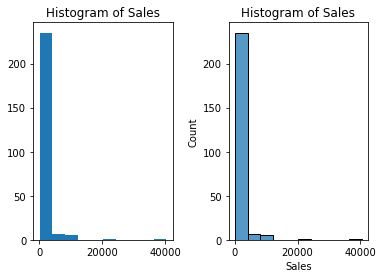

In [15]:
# histogram of Sales data

data = re['Sales']

# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
# the '121' value passed to the function says: "I am defining a 1x2 arrangement
# of subplots (as indicated by the first 2 digits '12'), and this is the 
# specification for the plot that will appear on the lefthand side (as indicated
# by the last digit '1')"
plt.subplot(121)

# define the plot you want to generate
plt.hist(data)

# define a title for the plot
plt.title('Histogram of Sales')

# --------------------------------------------------------------------------
# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear: set the number of bins
# for the x axis to 10
sns.histplot(data,bins=10)

# give the plot a title
plt.title('Histogram of Sales')

# define a width between 2 subolots
plt.subplots_adjust(wspace=0.4)

plt.show();

The above histogram and descriptive statistics show that the overall distribution of Sales is skewed to the right, with a mean of 1242.74 dollars, a minimum of 126 dollars, and a max of 40412. The histogram indicates that the average Sales are not high and that there are some outliers.

#### Preliminary Data Analysis - YOY_Sales

Now we gather descriptive statistics on YOY_Sales and create a box and whisker plot to display these statistics in a visualization so that we can quickly identify the shape of the distribution.

In [16]:
# show the mean, standard deviation, minimum, and quartiles for YOY_Sales across all restaurants with no null values
re['YOY_Sales'].describe()

count    250.000000
mean       0.029384
std        0.089538
min       -0.212000
25%       -0.023750
50%        0.022000
75%        0.065750
max        0.395000
Name: YOY_Sales, dtype: float64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


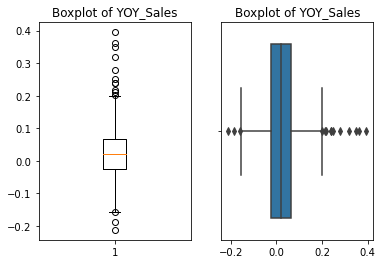

In [17]:
# boxplot of YOY_Sales data

data = re['YOY_Sales']

# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
# the '121' value passed to the function says: "I am defining a 1x2 arrangement
# of subplots (as indicated by the first 2 digits '12'), and this is the 
# specification for the plot that will appear on the lefthand side (as indicated
# by the last digit '1')"
plt.subplot(121)

# define the plot you want to generate
plt.boxplot(data)

# give the plot a title
plt.title('Boxplot of YOY_Sales')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

# --------------------------------------------------------------------------
# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear
sns.boxplot(data, orient = 'v')

# give the plot a title
plt.title('Boxplot of YOY_Sales')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of YOY_Sales is skewed right with a mean of 2.94%, a minimum of -2.12%, a max of 39.5%, and a standard deviation of 0.09. Based on this information as well as the box and whisker plot, there do appear to be many outliers.

#### Preliminary Data Analysis - Units

Here we examine the distribution of units. 

In [18]:
# show the mean, standard deviation, minimum, and quartiles for Units across all restaurants with no null values
re['Units'].describe()

count      250.000000
mean       850.076000
std       2296.151659
min         13.000000
25%         85.000000
50%        207.000000
75%        555.250000
max      23801.000000
Name: Units, dtype: float64

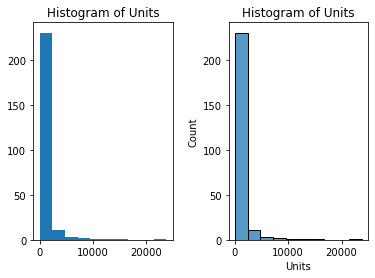

In [19]:
# histogram of Units data

data = re['Units']

# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
# the '121' value passed to the function says: "I am defining a 1x2 arrangement
# of subplots (as indicated by the first 2 digits '12'), and this is the 
# specification for the plot that will appear on the lefthand side (as indicated
# by the last digit '1')"
plt.subplot(121)

# define the plot you want to generate
plt.hist(data)

# define a title for the plot
plt.title('Histogram of Units')

# --------------------------------------------------------------------------
# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear: set the number of bins
# for the x axis to 10
sns.histplot(data,bins=10)

# give the plot a title
plt.title('Histogram of Units')

# # define a width between 2 subolots
plt.subplots_adjust(wspace=0.4)

plt.show();

The above histogram and descriptive statistics show that the overall distribution of Units is skewed to the right, with a mean of 850.08, a minimum of 13, and a max of 23801. The histogram indicates that the average Units are not high and that there are some outliers.

#### Preliminary Data Analysis - YOY_Units

Now we gather descriptive statistics on YOY_Units and create a box and whisker plot to display these statistics in a visualization so that we can quickly identify the shape of the distribution.

In [20]:
# show the mean, standard deviation, minimum, and quartiles for Units across all restaurants with no null values
re['YOY_Units'].describe()

count    250.000000
mean       0.012192
std        0.079364
min       -0.328000
25%       -0.020250
50%        0.000000
75%        0.034750
max        0.385000
Name: YOY_Units, dtype: float64

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


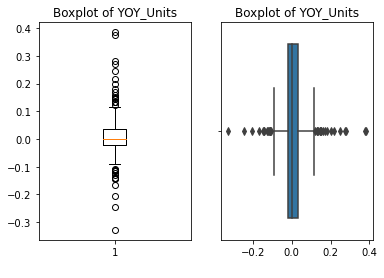

In [21]:
# boxplot of YOY_Units data

data = re['YOY_Units']

# define a new figure for plotting
plt.figure(1)

# define the plot that will appear on the lefthand side of the subplot:
# the '121' value passed to the function says: "I am defining a 1x2 arrangement
# of subplots (as indicated by the first 2 digits '12'), and this is the 
# specification for the plot that will appear on the lefthand side (as indicated
# by the last digit '1')"
plt.subplot(121)

# define the plot you want to generate
plt.boxplot(data)

# give the plot a title
plt.title('Boxplot of YOY_Units')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

# --------------------------------------------------------------------------
# now define the subplot that will appear on the righthand side of our 1x2
# subplot ('122' = 1x2, position 2)
plt.subplot(122)

# define the type of plot you want to appear
sns.boxplot(data, orient = 'v')

# give the plot a title
plt.title('Boxplot of YOY_Units')

# Here we'll blank out the x-axis label since it isn't really meaningful
# for a box plot
plt.xlabel(' ')

plt.show();

We can see from the descriptive statistics that the distribution of YOY_Units is skewed right with a mean of 1.22%, a minimum of -32.8%, a max of 38.5%, and a standard deviation of 0.08. Based on this information as well as the box and whisker plot, there do appear to be many outliers.

In [22]:
# get descriptive stats for Reataurant
re['Headquarters'].describe()

count             52
unique            39
top       Dallas, TX
freq               6
Name: Headquarters, dtype: object

In [23]:
# get descriptive stats for Reataurant
re['Segment_Category'].describe()

count             250
unique             48
top       Varied Menu
freq               22
Name: Segment_Category, dtype: object

# Inference

### Question1: What is the correlation between sales and units.

The following processes were undertaken to answer the problem above:

1. Get the descriptive stats about sales and Units,which will give us a initial sight of the data.

2. Use scatter plot by Matplotlib to show the basic distribution about two variables.

3. Use scatter plot by Seaborn to show the correlation between sales and units. 

Show the descriptive stats about 'Sales' and 'Units'

In [24]:
# the descriptive statistics about the 'Sales'
re['Sales'].describe()

count      250.00000
mean      1242.74000
std       3365.22882
min        126.00000
25%        181.00000
50%        330.00000
75%        724.75000
max      40412.00000
Name: Sales, dtype: float64

In [25]:
# the descriptive statistics about the 'Units'
re['Units'].describe()

count      250.000000
mean       850.076000
std       2296.151659
min         13.000000
25%         85.000000
50%        207.000000
75%        555.250000
max      23801.000000
Name: Units, dtype: float64

Use Matplotlib to make a scatter plot to show the relation between two variables

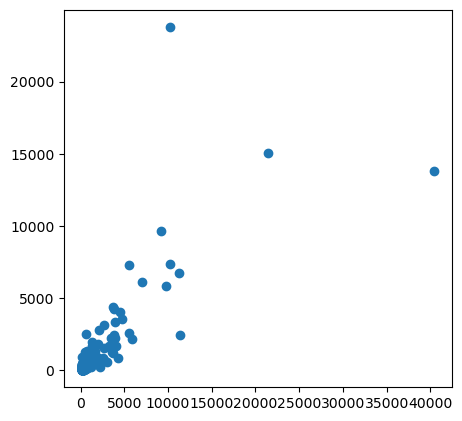

In [27]:
# combine these two attributes to make a scatter plot
# show the relation by using matplotlib 
plt.figure(figsize=(5,5),dpi=100)
plt.scatter(re['Sales'],re['Units'])
plt.show();

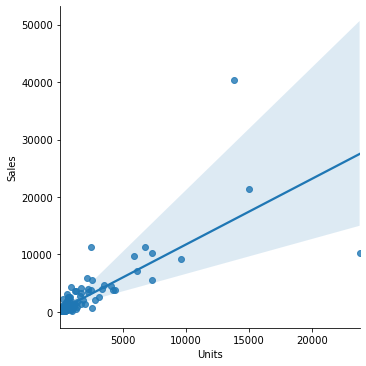

In [28]:
#Create a scatter plot with a auxiliary line to show the correlation
sns.lmplot(x = 'Units', y ='Sales', data = re);

As shown in the above descriptive stats and two scatter plots. We can know that the mean value of 'Sales' is 1242.74, there is a max value of 'Sales' is 40412, the 75th percentile is 724.75 and the standard deviations is 3365.23, which tells us that there are definitely outliers. The mean value of 'Units' is 850.076, there is a max value of 'Units' is 23801.00, the 75th percentile is 555.25, which also tells us there must be outliers. As the first figure show above, we can know that most data is gathered at the lower left part. There seems that two variables show a positive relationship. And when we looked at figure2 we can know about the line that the correlation between them is postive.

### Question2: What is the distribution about the whole top250 restaurants' YOY_Units during last year.

The following processes were undertaken to answer the problem above:

1. Get the descriptive stats about 'YOY_Units'

2. Use the seaborn to show the displot about 'YOY_Units.

3. Use the Matplotlib to show the histogram  about the 'YOY_Units' and then get the results.

Show the descriptive stats about 'YOY_Units'

In [29]:
# the descriptive statistics about the 'YOY_Units'
re['YOY_Units'].describe()

count    250.000000
mean       0.012192
std        0.079364
min       -0.328000
25%       -0.020250
50%        0.000000
75%        0.034750
max        0.385000
Name: YOY_Units, dtype: float64

Use Seaborn to make a displot to show the distribution about 'YOY_Units'

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


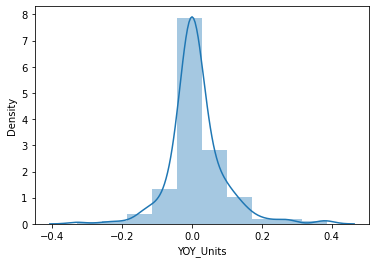

In [30]:
# use the seaborn to show the displot of 'YOY_Units'
sns.distplot(re['YOY_Units'],bins=10);

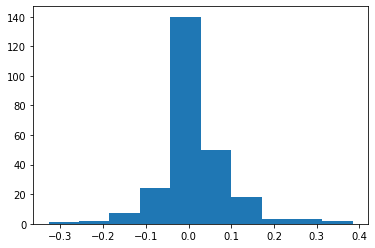

In [31]:
# create a histogram about 'YOY_Units' by matplotlib
plt.hist(re['YOY_Units']);

As shown in the above descriptive stats and  displot and line chart. We can know that the mean value of the 'YOY_Units' is 0.012192 with a min  value is -0.3280 and the max value is 0.385,the standard deviation is  0.079364. The 3 standard deviations above the mean would be nearly 0.25, so there definitely exists outliers. As first figure show that the whole distribution can be seen as a normal distribution.

### Question3: According to the'Quick Service & Coffee Cafe' and 'Quick Service & Burger', which one had better sales last year. 

The following processes were undertaken to answer the problem above:

1. Set up a new subset that contains two main attributes including'Quick Service & Coffee Cafe' and 'Quick Service & Burger'

2. Get the descriptive stats about the new subset.

3. Use matplotlib to show the boxplot about this data.

4. Use seaborn to show the boxplot about this data and get conclusion.

Set up a new dataset contains two main attributes

In [32]:
# set up different dataset in order to show their describe data
re2=re[(re['Segment_Category']=='Quick Service & Coffee Cafe')|(re['Segment_Category']=='Quick Service & Burger')]
re3=re[re['Segment_Category']=='Quick Service & Coffee Cafe']
re4=re[re['Segment_Category']=='Quick Service & Burger']

Show the descriptive stats about 'Sales'

In [33]:
# the descriptive statistics about the sales of two categories.
re2['Sales'].describe()

count       17.000000
mean      6545.470588
std      10307.314800
min        535.000000
25%        950.000000
50%       2020.000000
75%       9228.000000
max      40412.000000
Name: Sales, dtype: float64

In [34]:
# the Descriptive statistics about the sales of 'Quick Service & Coffee Cafe'
re3['Sales'].describe()

count        4.000000
mean      7972.250000
std       9812.654903
min        567.000000
25%        677.250000
50%       4971.000000
75%      12266.000000
max      21380.000000
Name: Sales, dtype: float64

In [35]:
# the Descriptive statistics about the sales of 'Quick Service & Burger'
re4['Sales'].describe()

count       13.000000
mean      6106.461538
std      10802.541951
min        535.000000
25%        957.000000
50%       2020.000000
75%       4687.000000
max      40412.000000
Name: Sales, dtype: float64

Use matplotlib to show the boxplot about this data.

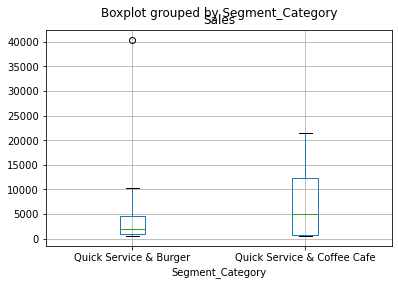

In [36]:
# use the matplotlib to create a boxplot to show the sales of two categories. 
re2.boxplot(column='Sales',by='Segment_Category');

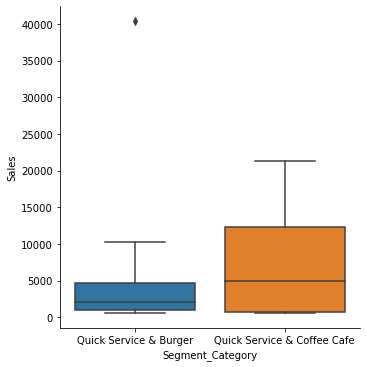

In [37]:
# use seaborn to create a boxplot to show the sales of two categories
sns.catplot(x='Segment_Category', y='Sales',kind='box', data=re2);

As shown in the above descriptive stats and boxplots, we can know that the mean 'sales of 'Quick Service & Coffee Cafe'is 7972.25 and the mean of 'sales of Quick Service & Burger' is 6106.46. As two plots showed above,we can know that the Coffee Cafe have better sales than Burger do. But the max sales' value of Burger and the Coffee Cafe's max value is 21380,which means the restaurants of Burger have a big boss to attract more people to buy their commodities. Also the difference about the mean value show that most of people will choose Coffee Cafe.

# Conclusion

According to the results of three questions, we may get a brief conclusion about above research. The correlation between sales and units can be seen as positive. When the units increase, sales will also increase to a certain extent. We can also consider the contribution about in the comparison of sales between the 'Quick Service & Burger'and 'Quick Service & Coffee Cafe', we can know that Coffee Cafe behave  better but the max outlier of Burger is higher. Although under the attack about COVID-19, these top250 restaurants still showed the positive attitudes towards it and get a lot of developments.

# References

Wes McKinney, Python for Data Analysis, 2nd edition, O’Reilly.  2018. 

Yang Yang,Hongbo Liu,Xiang Chen,COVID-19 and restaurant demand: early effects of the pandemic and stay-at-home orders, 2020.